In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Weather_Data.csv")

# Preview the dataset
df.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [2]:
# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes


Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [3]:
## Handling Missing Values
df.dropna()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
# Convert to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract date parts
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df['Weekday'] = df['Date/Time'].dt.day_name()

# Preview new features
df[['Date/Time', 'Year', 'Month', 'Day', 'Hour', 'Weekday']].head()


,Date/Time,Year,Month,Day,Hour,Weekday
0,2012-01-01 00:00:00,2012,1,1,0,Sunday
1,2012-01-01 01:00:00,2012,1,1,1,Sunday
2,2012-01-01 02:00:00,2012,1,1,2,Sunday
3,2012-01-01 03:00:00,2012,1,1,3,Sunday
4,2012-01-01 04:00:00,2012,1,1,4,Sunday


In [5]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Re-check types
df.dtypes


Duplicates: 0


Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
Year                         int32
Month                        int32
Day                          int32
Hour                         int32
Weekday                     object
dtype: object

In [6]:
# Drop duplicates if found
df = df.drop_duplicates()
print(df)

               Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  \
0    2012-01-01 00:00:00    -1.8              -3.9         86   
1    2012-01-01 01:00:00    -1.8              -3.7         87   
2    2012-01-01 02:00:00    -1.8              -3.4         89   
3    2012-01-01 03:00:00    -1.5              -3.2         88   
4    2012-01-01 04:00:00    -1.5              -3.3         88   
...                  ...     ...               ...        ...   
8779 2012-12-31 19:00:00     0.1              -2.7         81   
8780 2012-12-31 20:00:00     0.2              -2.4         83   
8781 2012-12-31 21:00:00    -0.5              -1.5         93   
8782 2012-12-31 22:00:00    -0.2              -1.8         89   
8783 2012-12-31 23:00:00     0.0              -2.1         86   

      Wind Speed_km/h  Visibility_km  Press_kPa               Weather  Year  \
0                   4            8.0     101.24                   Fog  2012   
1                   4            8.0     101.24              

In [7]:
# Filtering Invalid Values (Data Integrity Check)
df = df[(df['Rel Hum_%'] >= 0) & (df['Rel Hum_%'] <= 100)]
df = df[df['Wind Speed_km/h'] >= 0]
print("Filtered DataFrame with valid humidity and wind speed values:")
print(df.head())


Filtered DataFrame with valid humidity and wind speed values:
            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  Year  Month  Day  Hour  \
0            8.0     101.24                   Fog  2012      1    1     0   
1            8.0     101.24                   Fog  2012      1    1     1   
2            4.0     101.26  Freezing Drizzle,Fog  2012      1    1     2   
3            4.0     101.27  Freezing Drizzle,Fog  2012      1    1     3   
4            4.8     101.23                   Fog  2012      1    1     4   



In [8]:
# Summary statistics
df.describe()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Year,Month,Day,Hour
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.0,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,2012.0,6.513661,15.756831,11.500000
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,2012.0,1.000000,1.000000,0.000000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,2012.0,4.000000,8.000000,5.750000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,2012.0,7.000000,16.000000,11.500000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,2012.0,10.000000,23.000000,17.250000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,2012.0,12.000000,31.000000,23.000000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,0.0,3.451430,8.812031,6.922581


In [9]:
# Key numerical insights
print("Average Temperature:", df['Temp_C'].mean())
print("Most Common Weather Condition:", df['Weather'].mode()[0])


Average Temperature: 8.798144353369764
Most Common Weather Condition: Mainly Clear


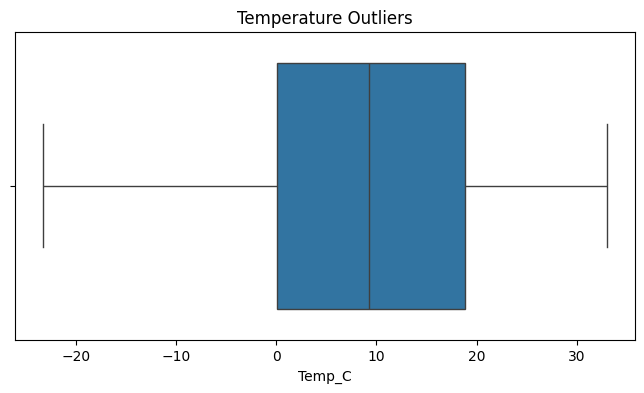

In [10]:
# Boxplot to check outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Temp_C'])
plt.title("Temperature Outliers")
plt.show()


In [11]:
# Cell 12 - Identify extreme temperature outliers
df[df['Temp_C'] < -20]


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day,Hour,Weekday
335,2012-01-14 23:00:00,-20.3,-26.2,59,9,25.0,101.79,Mostly Cloudy,2012,1,14,23,Saturday
336,2012-01-15 00:00:00,-21.2,-26.8,61,11,25.0,101.81,Cloudy,2012,1,15,0,Sunday
337,2012-01-15 01:00:00,-21.1,-26.6,61,9,25.0,101.86,Cloudy,2012,1,15,1,Sunday
338,2012-01-15 02:00:00,-21.4,-26.6,63,9,25.0,101.99,Cloudy,2012,1,15,2,Sunday
339,2012-01-15 03:00:00,-20.7,-26.1,62,4,25.0,102.04,Cloudy,2012,1,15,3,Sunday
340,2012-01-15 04:00:00,-21.0,-26.6,61,0,25.0,102.12,Cloudy,2012,1,15,4,Sunday
341,2012-01-15 05:00:00,-21.3,-26.5,63,6,25.0,102.19,Mostly Cloudy,2012,1,15,5,Sunday
342,2012-01-15 06:00:00,-23.2,-28.5,62,7,25.0,102.28,Mostly Cloudy,2012,1,15,6,Sunday
343,2012-01-15 07:00:00,-22.8,-28.0,62,9,25.0,102.37,Mainly Clear,2012,1,15,7,Sunday
344,2012-01-15 08:00:00,-23.3,-28.5,62,7,24.1,102.45,Clear,2012,1,15,8,Sunday


C:\Users\ASHISH YADAV\AppData\Local\Temp\ipykernel_17688\821078753.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Month", y="Temp_C", estimator='mean', ci=None)


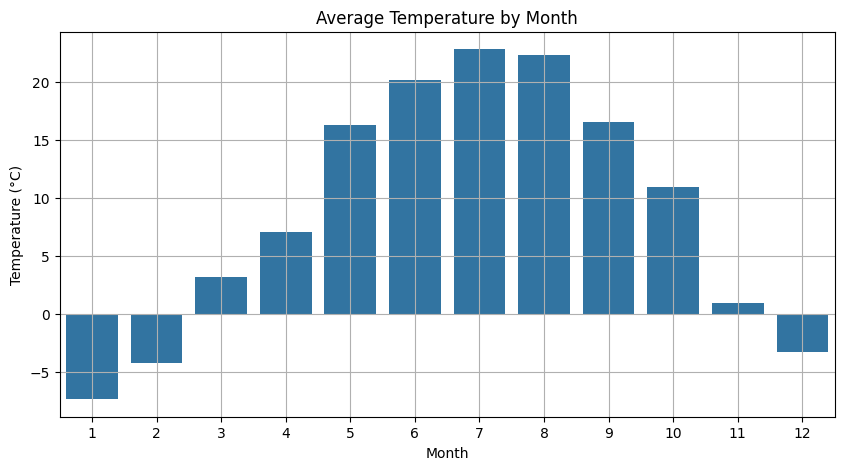

In [12]:
# Temperature trend by month
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Month", y="Temp_C", estimator='mean', ci=None)
plt.title("Average Temperature by Month")
plt.ylabel("Temperature (°C)")
plt.xlabel("Month")
plt.grid(True)
plt.show()


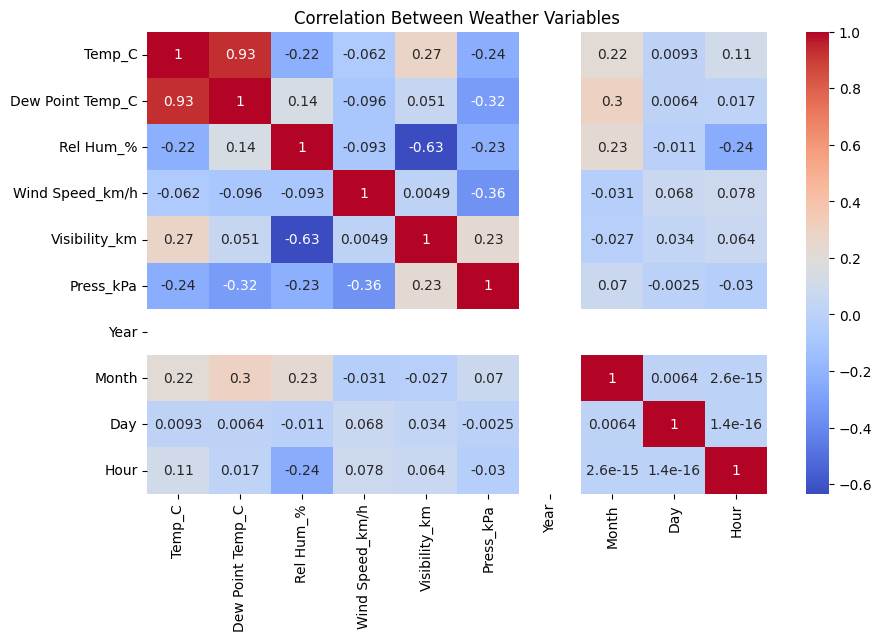

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Variables")
plt.show()


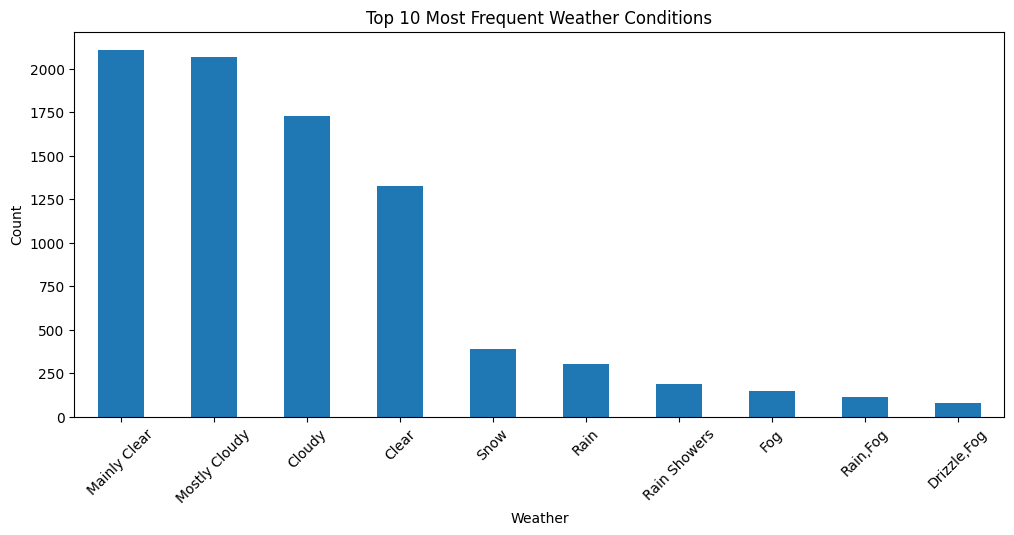

In [14]:
# Cell 14 - Weather condition frequency
plt.figure(figsize=(12, 5))
df['Weather'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\ASHISH YADAV\AppData\Local\Temp\ipykernel_17688\3709268399.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Temp_C', estimator='mean', ci=None)


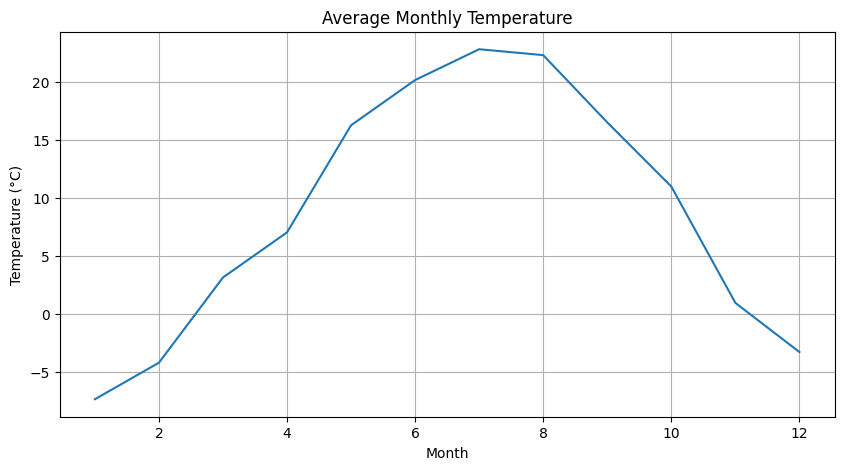

In [15]:
# Cell 9 - Monthly temperature trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Month', y='Temp_C', estimator='mean', ci=None)
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


C:\Users\ASHISH YADAV\AppData\Local\Temp\ipykernel_17688\2906786627.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Hour', y='Rel Hum_%', estimator='mean', ci=None)


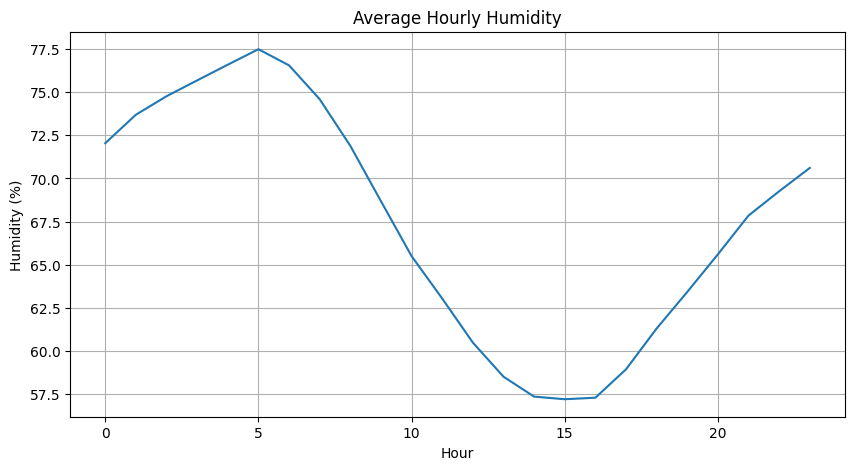

In [16]:
# Cell 10 - Hourly humidity trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Hour', y='Rel Hum_%', estimator='mean', ci=None)
plt.title("Average Hourly Humidity")
plt.xlabel("Hour")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()
